In [4]:
import pandas as pd
import math

gs_URL = 'https://docs.google.com/spreadsheets/d/1Fx7f6rM5Ce331F9ipsEMn-xRjUKYiR3R_v9IDBusUUY/edit#gid=46856285'
googleSheetId = gs_URL.split("spreadsheets/d/")[1].split("/edit")[0]
worksheetName = "Discrete"
URL = f'https://docs.google.com/spreadsheets/d/{googleSheetId}/gviz/tq?tqx=out:csv&sheet={worksheetName}' 
df = pd.read_csv(URL)
df = df.dropna(axis=1, how="all")

numeric_columns = list(df.select_dtypes(['float', 'int']).columns)
non_numeric_columns = list(df.select_dtypes(['object']).columns)

data = pd.DataFrame(columns = ['Type','Mean','Standard Deviation'])
drow = 0
for type in list(df[non_numeric_columns[0]].unique()):
    df1 = df[df[non_numeric_columns[0]]==type]
    x = df1[df.columns[0]]
    p_x = df1[df.columns[1]]
    data.loc[drow,'Type'] = type
    m = sum(x*p_x)
    data.loc[drow,'Mean'] =  m  
    data.loc[drow,'Standard Deviation'] = math.sqrt(sum((x-m)**2*p_x))
    drow = +1
    


data = data

In [2]:
import plotly.express as px
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'variable1': [1, 2, 3, 4],
                   'variable2': [10, 20, 30, 40],
                   'variable3': [100, 200, 300, 400]})

# Plot the three variables using scatter plot
fig = px.scatter(df, x='variable1', y='variable2', color='variable3', size='variable3')

# Show the plot
fig.show()


2023-08-25 16:32:46.302 
  command:

    streamlit run C:\Users\harmk\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

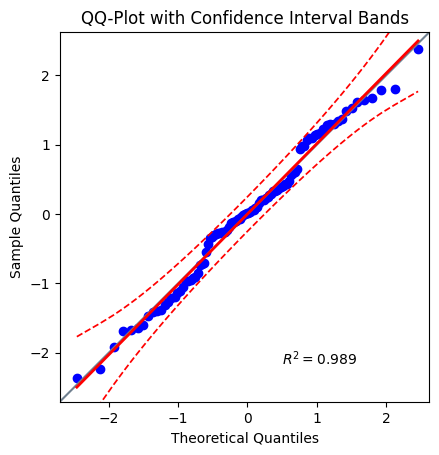

In [1]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

# Generate some data
data = np.random.normal(5, 10, 100)

# Create a QQ-plot with confidence interval bands
fig, ax = plt.subplots()
ax = pg.qqplot(data, dist='norm', confidence=.95)

# Add labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.set_title('QQ-Plot with Confidence Interval Bands')

# Show the plot in Streamlit
st.pyplot(fig)